# Preliminar

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("Spotify con lyrics-v0.xlsx")
df

,track_id,artists,song,lyrics
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,NaN
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,NaN
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a..."
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark..."
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n..."
...,...,...,...,...
89736,4xZIMRwaaBx7CZMmM6KLuh,黃小琥,沒那麽簡單,沒那麼簡單 就能找到 聊得來的伴\n 尤其是在 看過了那麼多的背叛\n 總是不安 只好強悍\...
89737,1Q5d3X55pI7nBXYAdZ0g8Z,黃敏華,堤岸,寒夜悄靜 街燈更顯昏黃\n 站岸堤聽水聲 與它低聲唱\n 心中恬靜樂暢\n 無謂多憂傷 將鬱...
89738,1t4LWH3LrFAwCTHgUKM16s,龍藏Ryuzo,紅蓮の弓矢 (Instrumental),NaN
89739,5Qn6Ys1fHlef8zgCLqCdud,龍藏Ryuzo,ゲゲゲの鬼太郎 (Instrumental),NaN


In [15]:
df.describe()

,track_id,artists,song,lyrics
count,89741,89707,89737,58084
unique,89741,31436,73606,50266
top,3v6ypsJzaoY2xgYp6mMJfM,George Jones,Rockin' Around The Christmas Tree,(Aah-aah-aah-ah)\n Rockin' around the Christma...
freq,1,260,48,45


In [12]:
df2 = df.copy()

In [14]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
tqdm.pandas()

def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return "unknown"

df2['idioma'] = df2['lyrics'].progress_apply(lambda x: detectar_idioma(x) if pd.notnull(x) else "missing")

df2

100%|██████████| 89741/89741 [06:19<00:00, 236.27it/s]


,track_id,artists,song,lyrics,idioma
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,NaN,missing
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,NaN,missing
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en
...,...,...,...,...,...
89736,4xZIMRwaaBx7CZMmM6KLuh,黃小琥,沒那麽簡單,沒那麼簡單 就能找到 聊得來的伴\n 尤其是在 看過了那麼多的背叛\n 總是不安 只好強悍\...,ko
89737,1Q5d3X55pI7nBXYAdZ0g8Z,黃敏華,堤岸,寒夜悄靜 街燈更顯昏黃\n 站岸堤聽水聲 與它低聲唱\n 心中恬靜樂暢\n 無謂多憂傷 將鬱...,ko
89738,1t4LWH3LrFAwCTHgUKM16s,龍藏Ryuzo,紅蓮の弓矢 (Instrumental),NaN,missing
89739,5Qn6Ys1fHlef8zgCLqCdud,龍藏Ryuzo,ゲゲゲの鬼太郎 (Instrumental),NaN,missing


In [16]:
df2.to_excel("Spotify lyrics con idioma.xlsx", index=False)

In [19]:
df2 = df2[df2["idioma"] == "en"]
df2

,track_id,artists,song,lyrics,idioma
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en
5,6LlUAzeDR4D5y0YsCkAlFO,"""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...","Gump sat alone on a bench in the park\n ""My na...",en
6,4uPOZjjtf8hwD7uxArwVh4,"""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",Seven o'clock in the evening\n Watchin somethi...,en
...,...,...,...,...,...
89723,2DwsuwDtMtZykInr8cFo1j,高爾宣 OSN,Somebody Else,我們在做什麼\n The problems we caused\n Had my back ...,en
89724,1rjUBUTswCkN8DIBxkgjJs,高爾宣 OSN,Why You Gonna Lie,愛情是那種很經典的故事\n 能說很多遍\n 也隨著時間慢慢老去你會懂很多遍\n 有時候想成為...,en
89725,3dGkfiu2IKSWZRfmBoUxvV,高爾宣 OSN;Vicky Chen,Without You - Acoustic Version,I'm still the same 都好像沒有變\n Nothing changed 還是...,en
89726,3N0srZgpRLSY2ziJ1FsJh9,高爾宣 OSN;sunkis,Work,You know I put in work\n 實現你放的每個天燈\n I'll alwa...,en


# TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import spacy
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

nlp_es = spacy.load('es_core_news_sm') # modelo de spaCy en español

# TF-IDF vectorizer solo para visualización de palabras importantes
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df2['lyrics'].fillna(''))

In [ ]:
# Función de análisis de sentimiento
def analizar_sentimiento(texto, idioma):
    if pd.isnull(texto):
        return 0.0
    try:
        if idioma == 'en':
            return TextBlob(texto).sentiment.polarity  # entre -1 y 1
        elif idioma == 'es':
            doc = nlp_es(texto)
            # Si tiene más adjetivos positivos que negativos, entonces es más positivo y su polaridad es positiva, pero por ahora solo ingles
            polaridad = sum(1 for tok in doc if tok.pos_ == "ADJ" and tok._.polarity > 0) - \
                        sum(1 for tok in doc if tok.pos_ == "ADJ" and tok._.polarity < 0)
            return polaridad
        else:
            return 0.0
    except:
        return 0.0

df2['sentimiento'] = df2.progress_apply(lambda row: analizar_sentimiento(row['lyrics'], row['idioma']), axis=1)
df2

100%|██████████| 32101/32101 [00:49<00:00, 651.61it/s]
C:\Users\diego\AppData\Local\Temp\ipykernel_13424\138841390.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentimiento'] = df2.progress_apply(lambda row: analizar_sentimiento(row['lyrics'], row['idioma']), axis=1)


,track_id,artists,song,lyrics,idioma,sentimiento
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en,0.423854
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en,-0.100000
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en,0.245615
5,6LlUAzeDR4D5y0YsCkAlFO,"""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...","Gump sat alone on a bench in the park\n ""My na...",en,-0.057212
6,4uPOZjjtf8hwD7uxArwVh4,"""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",Seven o'clock in the evening\n Watchin somethi...,en,-0.017307
...,...,...,...,...,...,...
89723,2DwsuwDtMtZykInr8cFo1j,高爾宣 OSN,Somebody Else,我們在做什麼\n The problems we caused\n Had my back ...,en,0.000000
89724,1rjUBUTswCkN8DIBxkgjJs,高爾宣 OSN,Why You Gonna Lie,愛情是那種很經典的故事\n 能說很多遍\n 也隨著時間慢慢老去你會懂很多遍\n 有時候想成為...,en,0.240000
89725,3dGkfiu2IKSWZRfmBoUxvV,高爾宣 OSN;Vicky Chen,Without You - Acoustic Version,I'm still the same 都好像沒有變\n Nothing changed 還是...,en,0.021405
89726,3N0srZgpRLSY2ziJ1FsJh9,高爾宣 OSN;sunkis,Work,You know I put in work\n 實現你放的每個天燈\n I'll alwa...,en,0.241925


In [23]:
df2['clasificacion'] = df2['sentimiento'].apply(
    lambda x: 'positivo' if x > 0.1 else ('negativo' if x < -0.1 else 'neutral')
)

df2['clasificacion'].value_counts()

C:\Users\diego\AppData\Local\Temp\ipykernel_13424\1040050683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clasificacion'] = df2['sentimiento'].apply(


clasificacion
positivo    14955
neutral     12641
negativo     4505
Name: count, dtype: int64

# Merge con dataframe original

In [27]:
spotify = pd.read_csv(r"D:\Escritorio D\Mineria de Datos\Proyecto\dataset\dataset.csv")
spotify = spotify.drop(columns=['Unnamed: 0'])
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [28]:
prueba = df2.merge(spotify, on="track_id", how="left")
prueba = prueba.drop_duplicates()
prueba

,track_id,artists_x,song,lyrics,idioma,sentimiento,clasificacion,artists_y,album_name,track_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en,0.423854,positivo,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Going on a Mission,...,-3.839,0,0.0470,0.02100,0.000000,0.0930,0.957,93.937,3,children
1,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en,-0.100000,neutral,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,...,-4.709,1,0.2020,0.17100,0.001410,0.2020,0.873,182.148,4,children
2,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en,0.245615,positivo,"""Weird Al"" Yankovic",Polka Party,Good Enough for Now,...,-13.015,1,0.0291,0.04750,0.000000,0.2090,0.855,130.758,4,comedy
3,6LlUAzeDR4D5y0YsCkAlFO,"""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...","Gump sat alone on a bench in the park\n ""My na...",en,-0.057212,neutral,"""Weird Al"" Yankovic","The Essential ""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...",...,-6.505,1,0.0390,0.00837,0.000002,0.2940,0.907,144.354,4,comedy
4,4uPOZjjtf8hwD7uxArwVh4,"""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",Seven o'clock in the evening\n Watchin somethi...,en,-0.017307,neutral,"""Weird Al"" Yankovic","The Essential ""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",...,-8.998,1,0.0880,0.46000,0.000000,0.2220,0.692,108.061,4,comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44042,2DwsuwDtMtZykInr8cFo1j,高爾宣 OSN,Somebody Else,我們在做什麼\n The problems we caused\n Had my back ...,en,0.000000,neutral,高爾宣 OSN,Somebody Else,Somebody Else,...,-7.310,1,0.0545,0.32000,0.000000,0.0942,0.787,114.044,4,mandopop
44043,1rjUBUTswCkN8DIBxkgjJs,高爾宣 OSN,Why You Gonna Lie,愛情是那種很經典的故事\n 能說很多遍\n 也隨著時間慢慢老去你會懂很多遍\n 有時候想成為...,en,0.240000,positivo,高爾宣 OSN,#osnrap,Why You Gonna Lie,...,-3.729,1,0.1050,0.76200,0.000000,0.1410,0.736,90.000,4,mandopop
44044,3dGkfiu2IKSWZRfmBoUxvV,高爾宣 OSN;Vicky Chen,Without You - Acoustic Version,I'm still the same 都好像沒有變\n Nothing changed 還是...,en,0.021405,neutral,高爾宣 OSN;Vicky Chen,#osnrap,Without You - Acoustic Version,...,-3.333,1,0.0478,0.59000,0.000000,0.0624,0.573,153.894,4,mandopop
44045,3N0srZgpRLSY2ziJ1FsJh9,高爾宣 OSN;sunkis,Work,You know I put in work\n 實現你放的每個天燈\n I'll alwa...,en,0.241925,positivo,高爾宣 OSN;sunkis,Work,Work,...,-6.653,1,0.0408,0.13600,0.000000,0.1130,0.114,100.005,4,mandopop


Este dataframe contiene las canciones del dataframe original combinado con el dataframe de letras con sentimiento. Se filtró manteniendo solo inglés por ahora, pero se puede extender a cualquier combinación.

Algunas canciones se repiten porque tienen asociado más de un género. ***(Ver como abordar)***

In [46]:
spotify = prueba.copy()

In [83]:
prueba.to_excel("Prueba spotify con letra.xlsx", index=False)

In [84]:
prueba.to_parquet("Prueba spotify con letra.parquet", index=False)

# Exploración

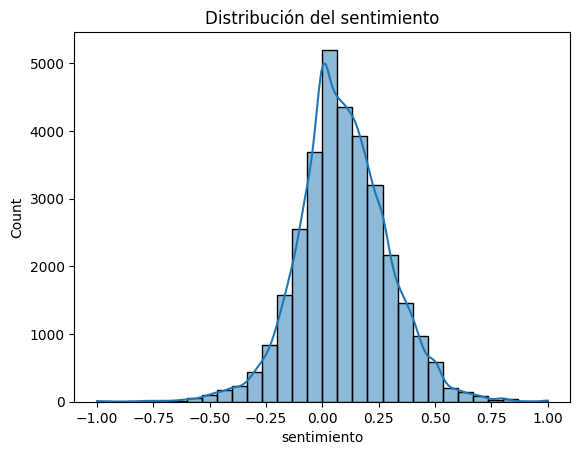

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['sentimiento'], bins=30, kde=True)
plt.title('Distribución del sentimiento')
plt.show()

La mayoría de las canciones tienden a ser más positivas (recordar que la métrica para ver positividad solo es la cantidad de adjetivos positivos)

Artistas con sentimiento promedio más positivo

In [35]:
df2.groupby('artists')['sentimiento'].mean().sort_values(ascending=False).head(10)

artists
At17                                   1.000000
3 Steps Ahead                          1.000000
Vini Vici;Pixel                        0.976562
yetep;Olmos                            0.850000
Evil Activities;Chaosphere             0.850000
Shenseea;Tyga                          0.827018
ILLENIUM;Call Me Karizma;Hex Cougar    0.800781
Neolux                                 0.800000
AcesToAces                             0.800000
HYDE                                   0.800000
Name: sentimiento, dtype: float64

Canciones más positivas

In [36]:
df2.sort_values('sentimiento', ascending=False)[['song', 'artists', 'sentimiento']].head(5)  # más positivas

,song,artists,sentimiento
60570,The Weight Loss Plan,Patton Oswalt,1.0
69835,THE END OF THE CENTURY,Seikima-II,1.0
12475,C.M.E.,Bölzer,1.0
84436,Charged Words,Western Addiction,1.0
21936,Goin' On A Berry Hunt,Dora The Explorer,1.0


Canciones más negativas

In [37]:
df2.sort_values('sentimiento')[['song', 'artists', 'sentimiento']].head(5)  # más negativas

,song,artists,sentimiento
22776,Sentence,ERA,-1.0
35318,Mortado,Impetigo,-1.0
7518,DRAMATIC? DRASTIC!,BOØWY,-1.0
29835,Faith,Ghost,-1.0
64618,I Wanna Be Sedated,Ramones,-1.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

positivas = df2[df2['clasificacion'] == 'positivo']['lyrics'].dropna()
negativas = df2[df2['clasificacion'] == 'negativo']['lyrics'].dropna()

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

X_pos = vectorizer.fit_transform(positivas)
print("Palabras más importantes en canciones positivas:")
print(vectorizer.get_feature_names_out())

Palabras más importantes en canciones positivas:
['baby' 'cause' 'come' 'don' 'feel' 'got' 'just' 'know' 'let' 'like' 'll'
 'love' 'make' 'oh' 'ooh' 'time' 've' 'wanna' 'want' 'yeah']


In [40]:
X_neg = vectorizer.fit_transform(negativas)

print("Palabras más importantes en canciones negativas:")
print(vectorizer.get_feature_names_out())

Palabras más importantes en canciones negativas:
['bad' 'cause' 'don' 'feel' 'fuck' 'got' 'just' 'know' 'la' 'let' 'like'
 'll' 'make' 'oh' 'say' 'time' 've' 'wanna' 'want' 'yeah']


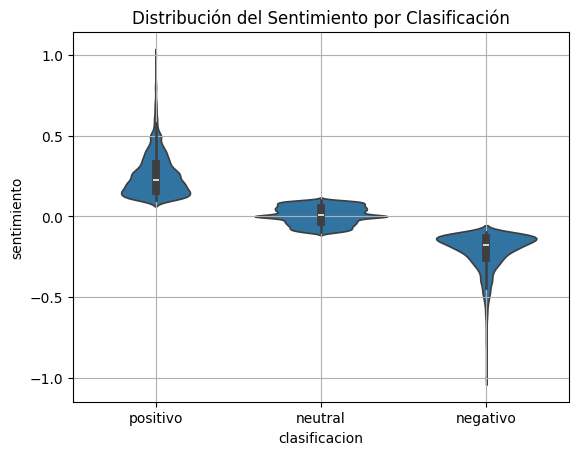

In [82]:
sns.violinplot(data=df2, x='clasificacion', y='sentimiento')
plt.title('Distribución del Sentimiento por Clasificación')
plt.grid()
plt.show()

## Multivariable

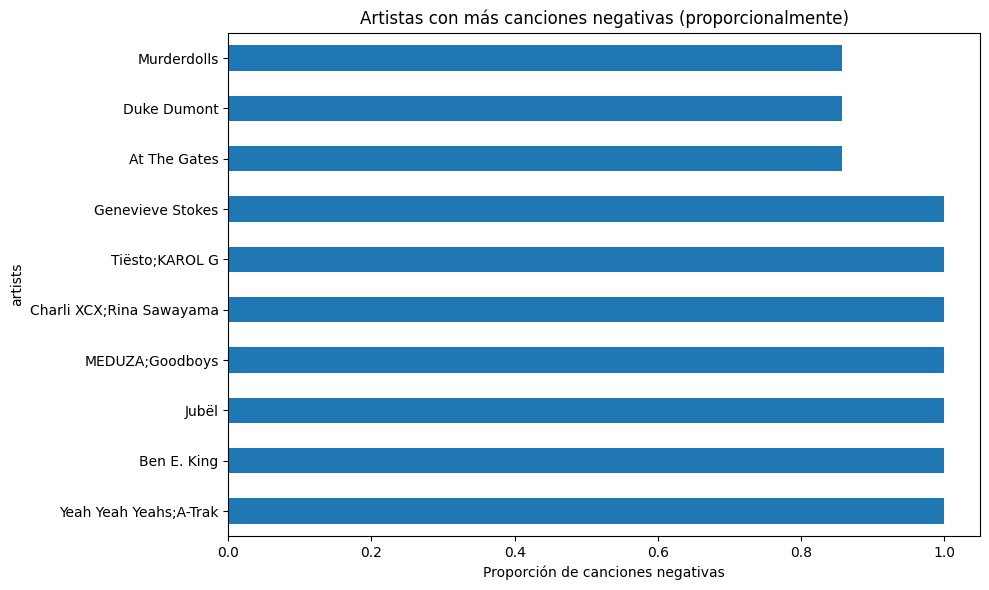

In [ ]:
# cantidad de canciones de cada tipo de sentimiento
artistas_sentimiento = df2.groupby(['artists', 'clasificacion']).size().unstack(fill_value=0)

# proporción de canciones negativas
artistas_sentimiento['total'] = artistas_sentimiento.sum(axis=1)
artistas_sentimiento['proporcion_neg'] = artistas_sentimiento['negativo'] / artistas_sentimiento['total']

# Mostrar los 10 artistas con mayor proporción de canciones negativas (y con al menos 5 canciones)
artistas_mas_negativos = artistas_sentimiento[artistas_sentimiento['total'] >= 5].sort_values('proporcion_neg', ascending=False).head(10)

artistas_mas_negativos['proporcion_neg'].plot(kind='barh', figsize=(10, 6), title='Artistas con más canciones negativas (proporcionalmente)')
plt.xlabel('Proporción de canciones negativas')
plt.tight_layout()
plt.show()

In [44]:
spotify.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

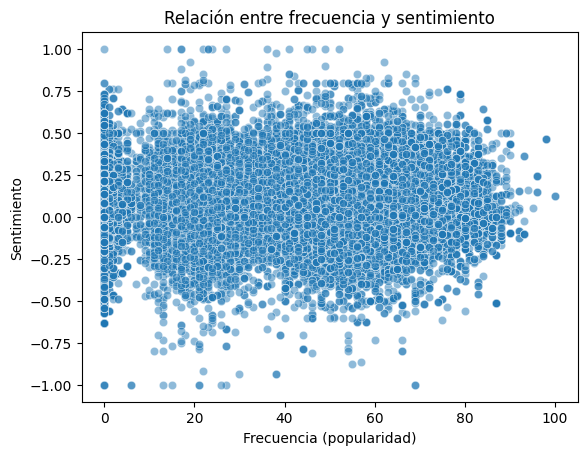

Correlación popularity vs sentimiento: -0.042950138049776744


In [ ]:
# Asegúrate de que la columna 'freq' esté presente y sea numérica
spotify['freq'] = pd.to_numeric(spotify['popularity'], errors='coerce')

# Gráfico de dispersión
import seaborn as sns

sns.scatterplot(data=spotify, x='popularity', y='sentimiento', alpha=0.5)
plt.title('Relación entre frecuencia y sentimiento')
plt.xlabel('Frecuencia (popularidad)')
plt.ylabel('Sentimiento')
plt.show()

# Correlación
print("Correlación popularity vs sentimiento:", spotify[['popularity', 'sentimiento']].corr().iloc[0,1])

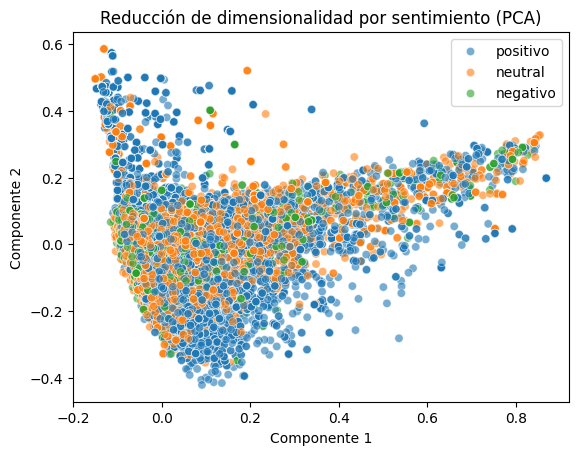

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# letras no nulas
df_filtrado = spotify[spotify['lyrics'].notnull()].copy()

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df_filtrado['lyrics'])

# rducción con PCA (más rápido)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

df_filtrado['pca_x'] = X_pca[:, 0]
df_filtrado['pca_y'] = X_pca[:, 1]

sns.scatterplot(data=df_filtrado, x='pca_x', y='pca_y', hue='clasificacion', alpha=0.6)
plt.title('Reducción de dimensionalidad por sentimiento (PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

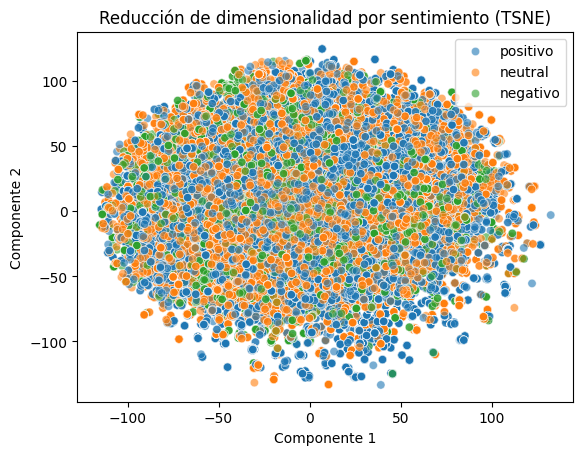

In [49]:
from sklearn.manifold import TSNE

# ahora reducción con t-SNE (más lento pero más expresivo visualmente)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Agregar resultado al DataFrame
df_filtrado['pca_x'] = X_tsne[:, 0]
df_filtrado['pca_y'] = X_tsne[:, 1]

sns.scatterplot(data=df_filtrado, x='pca_x', y='pca_y', hue='clasificacion', alpha=0.6)
plt.title('Reducción de dimensionalidad por sentimiento (TSNE)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

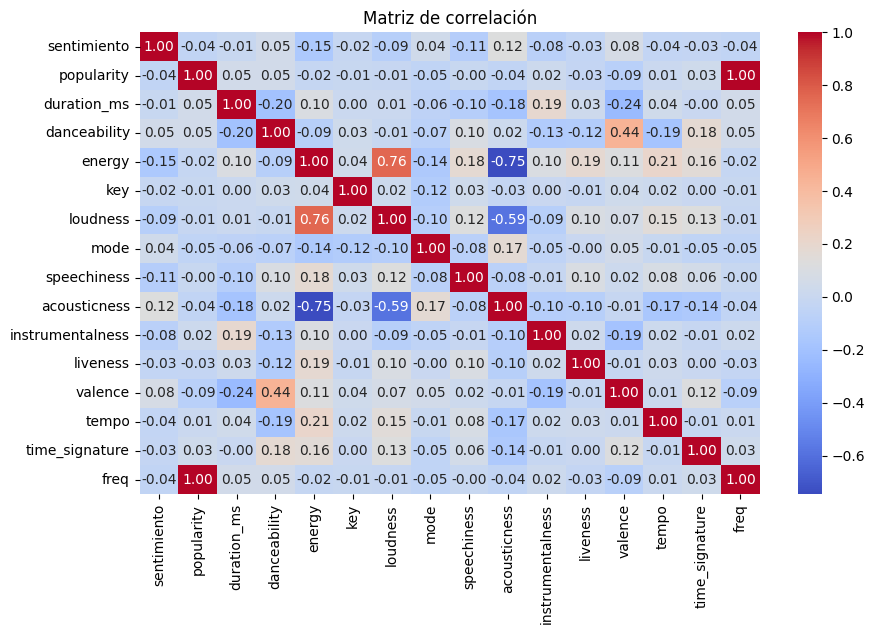

In [50]:
# Seleccionar columnas numéricas
numericas = spotify.select_dtypes(include='number')

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## Características de canciones

In [53]:
spotify["artists"] = spotify["artists_x"]

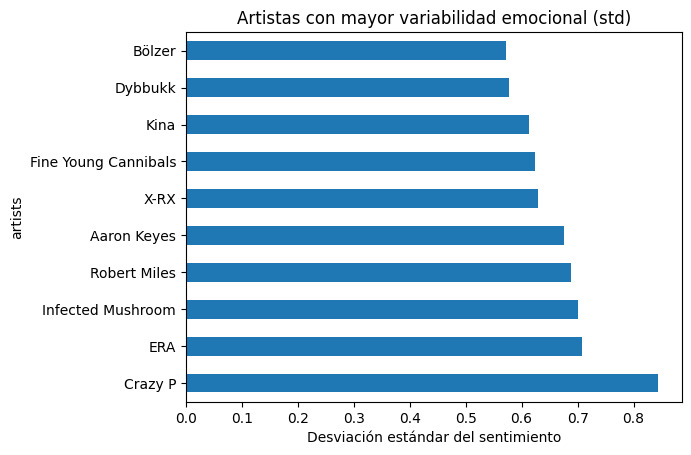

In [54]:
# Desviación estándar del sentimiento por artista
variabilidad = spotify.groupby('artists')['sentimiento'].std().dropna().sort_values(ascending=False).head(10)

variabilidad.plot(kind='barh', title='Artistas con mayor variabilidad emocional (std)')
plt.xlabel('Desviación estándar del sentimiento')
plt.show()

Palabras más representativas

In [55]:
top_generos = spotify['track_genre'].value_counts().head(10).index

for genero in top_generos:
    letras = spotify[spotify['track_genre'] == genero]['lyrics'].dropna()
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    X = vectorizer.fit_transform(letras)
    print(f"\n🎧 Palabras más representativas para el género '{genero}':")
    print(", ".join(vectorizer.get_feature_names_out()))


🎧 Palabras más representativas para el género 'grunge':
away, don, just, know, like, ll, oh, time, ve, yeah

🎧 Palabras más representativas para el género 'metalcore':
don, feel, just, know, let, like, ll, oh, time, ve

🎧 Palabras más representativas para el género 'country':
christmas, don, got, just, know, like, ll, love, oh, yeah

🎧 Palabras más representativas para el género 'soul':
baby, christmas, don, feel, just, know, like, love, oh, yeah

🎧 Palabras más representativas para el género 'sad':
cause, don, got, just, know, like, ll, love, wanna, yeah

🎧 Palabras más representativas para el género 'dance':
baby, don, just, know, la, let, like, love, oh, yeah

🎧 Palabras más representativas para el género 'rock':
christmas, don, just, know, like, little, oh, thunder, time, ve

🎧 Palabras más representativas para el género 'metal':
away, don, just, know, like, ll, love, oh, ve, yeah

🎧 Palabras más representativas para el género 'alternative':
don, feel, just, know, like, ll, love, 

Esas serían las más representativas pero se repiten entre géneros, asi que son representativas de la música en inglés en general.

Para ver las palabras que distinguen un género de otro, calculamos tf-idf con todas las letrsa disponibles (demora un poco más en correr que el de arriba):

In [ ]:
spotify_filtrado = spotify.dropna(subset=['lyrics'])

# TF-IDF con todo el corpus
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(spotify_filtrado['lyrics'])
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df['track_genre'] = spotify_filtrado['track_genre'].values

# Ver los géneros más comunes
top_generos = spotify_filtrado['track_genre'].value_counts().head(10).index

for genero in top_generos:
    media = tfidf_df[tfidf_df['track_genre'] == genero].drop(columns='track_genre').mean()
    top_words = media.sort_values(ascending=False).head(10) # podemos ver más palabras subiendo el 10
    print(f"\n🎧 Palabras más representativas del género '{genero}':")
    print(", ".join(top_words.index))


🎧 Palabras más representativas del género 'grunge':
away, ll, don, ve, know, oh, like, just, yeah, let

🎧 Palabras más representativas del género 'metalcore':
don, know, ve, ll, just, like, let, feel, away, fucking

🎧 Palabras más representativas del género 'country':
christmas, don, like, love, just, got, oh, ain, ll, know

🎧 Palabras más representativas del género 'soul':
christmas, oh, love, yeah, baby, claus, know, santa, merry, don

🎧 Palabras más representativas del género 'sad':
don, yeah, know, like, just, love, wanna, got, ll, cause

🎧 Palabras más representativas del género 'dance':
oh, la, yeah, baby, like, know, don, love, just, got

🎧 Palabras más representativas del género 'rock':
oh, christmas, don, ooh, yeah, nick, merry, ll, know, time

🎧 Palabras más representativas del género 'metal':
oh, ve, don, know, away, ll, love, just, yeah, like

🎧 Palabras más representativas del género 'alternative':
oh, don, yeah, love, know, ll, like, just, wanna, ve

🎧 Palabras más repre

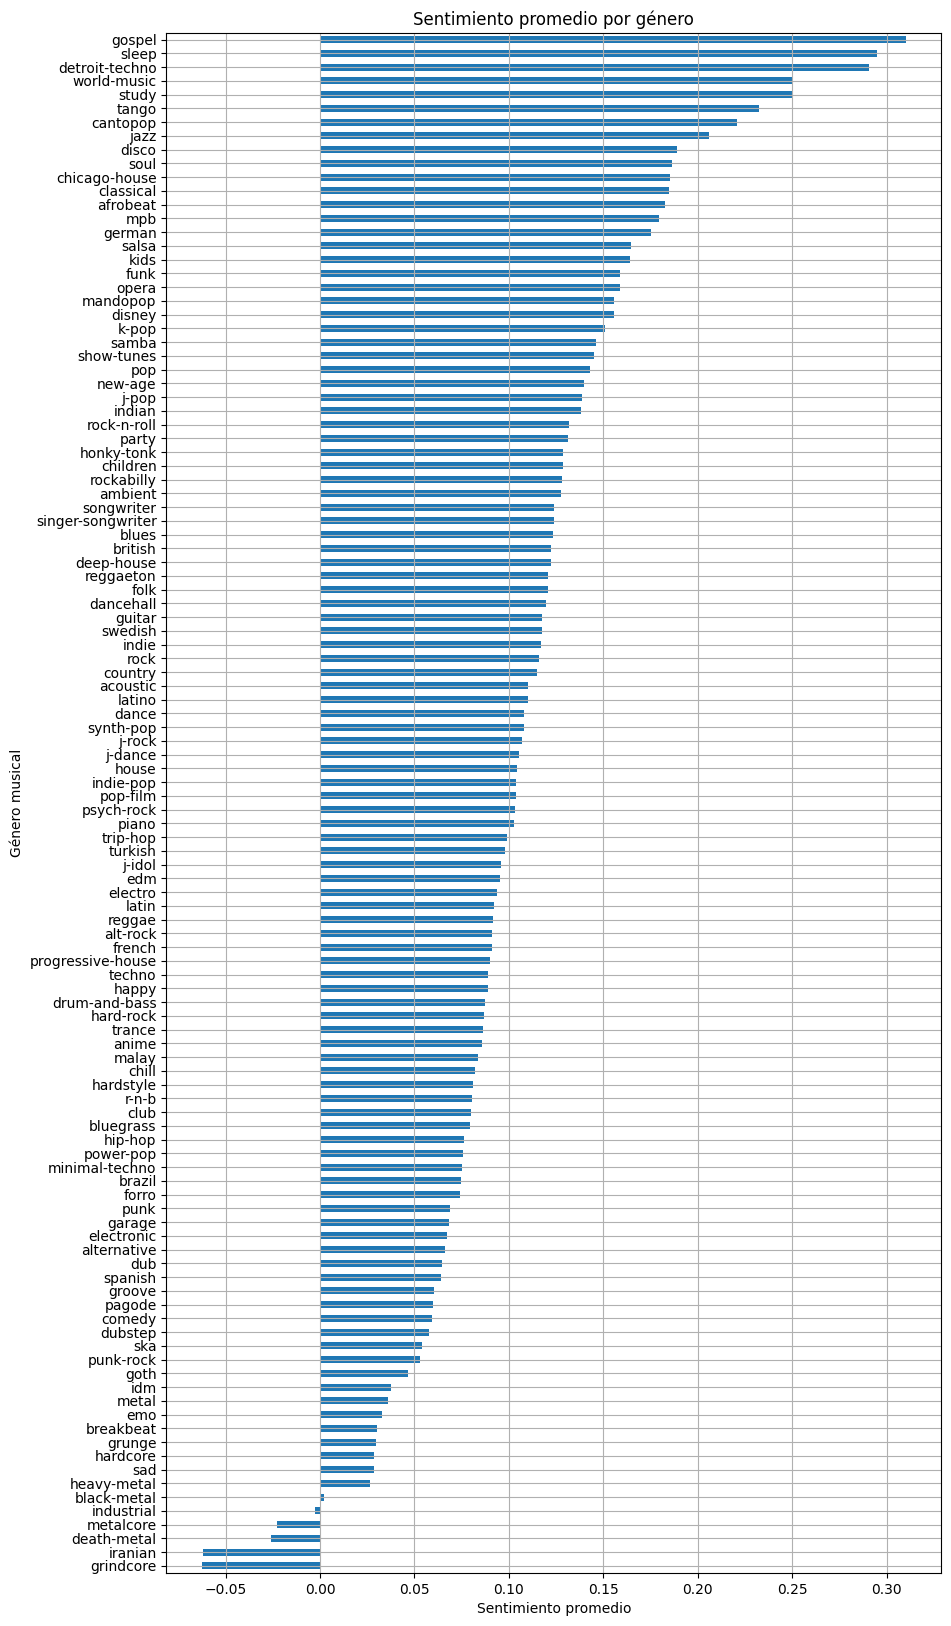

In [60]:
genero_sentimiento = spotify.groupby('track_genre')['sentimiento'].mean().sort_values()

# Mostrar los más felices y más tristes
genero_sentimiento.plot(kind='barh', figsize=(10, 20), title='Sentimiento promedio por género')
plt.xlabel('Sentimiento promedio')
plt.ylabel('Género musical')
plt.grid()
plt.show()

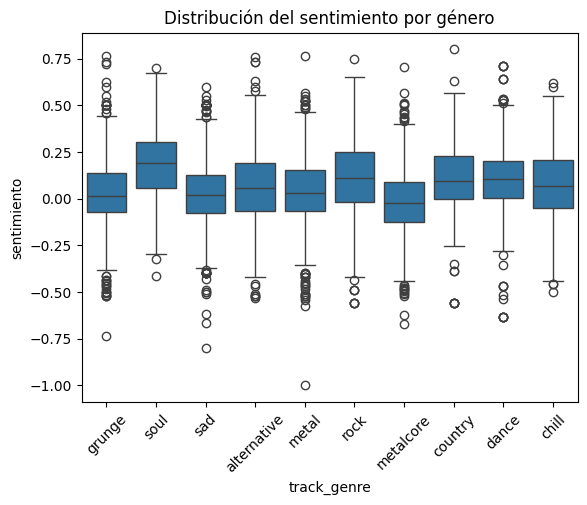

In [57]:
sns.boxplot(data=spotify[spotify['track_genre'].isin(top_generos)], x='track_genre', y='sentimiento')
plt.title('Distribución del sentimiento por género')
plt.xticks(rotation=45)
plt.show()

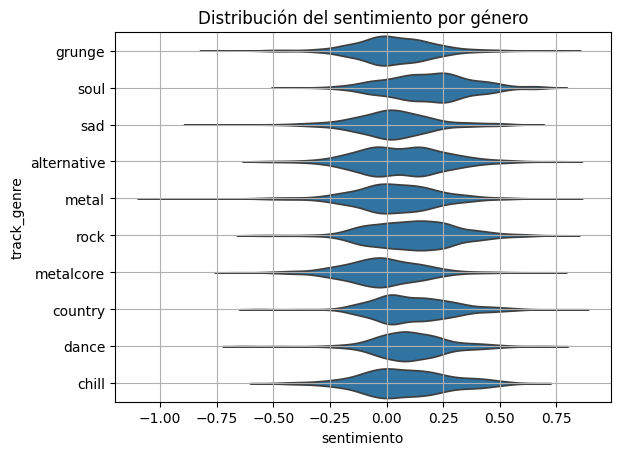

In [72]:
sns.violinplot(data=spotify[spotify['track_genre'].isin(top_generos)], 
               x='sentimiento', y='track_genre', orient='h', inner=None, scale='width')
plt.title('Distribución del sentimiento por género')
plt.grid()
plt.show()

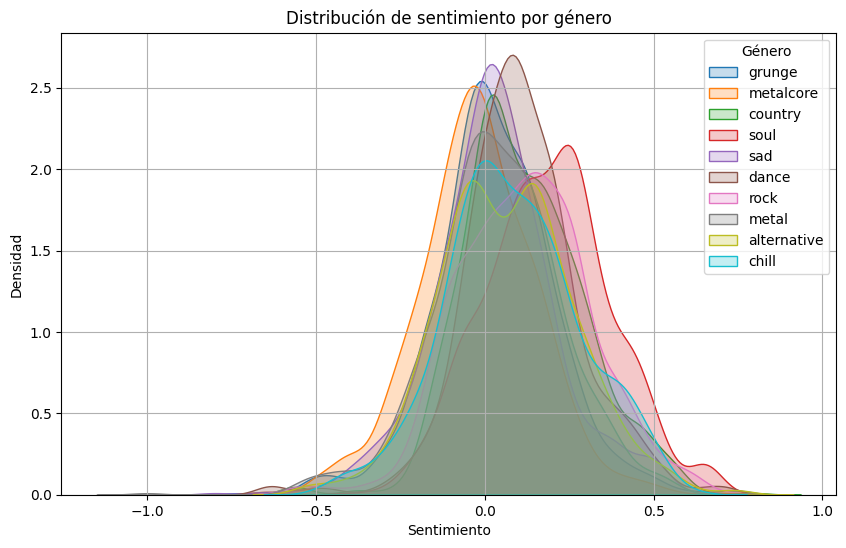

In [73]:
plt.figure(figsize=(10, 6))

for genero in top_generos:
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], label=genero, shade=True, common_norm=False)

plt.title('Distribución de sentimiento por género')
plt.xlabel('Sentimiento')
plt.ylabel('Densidad')
plt.legend(title='Género')
plt.grid()
plt.show()

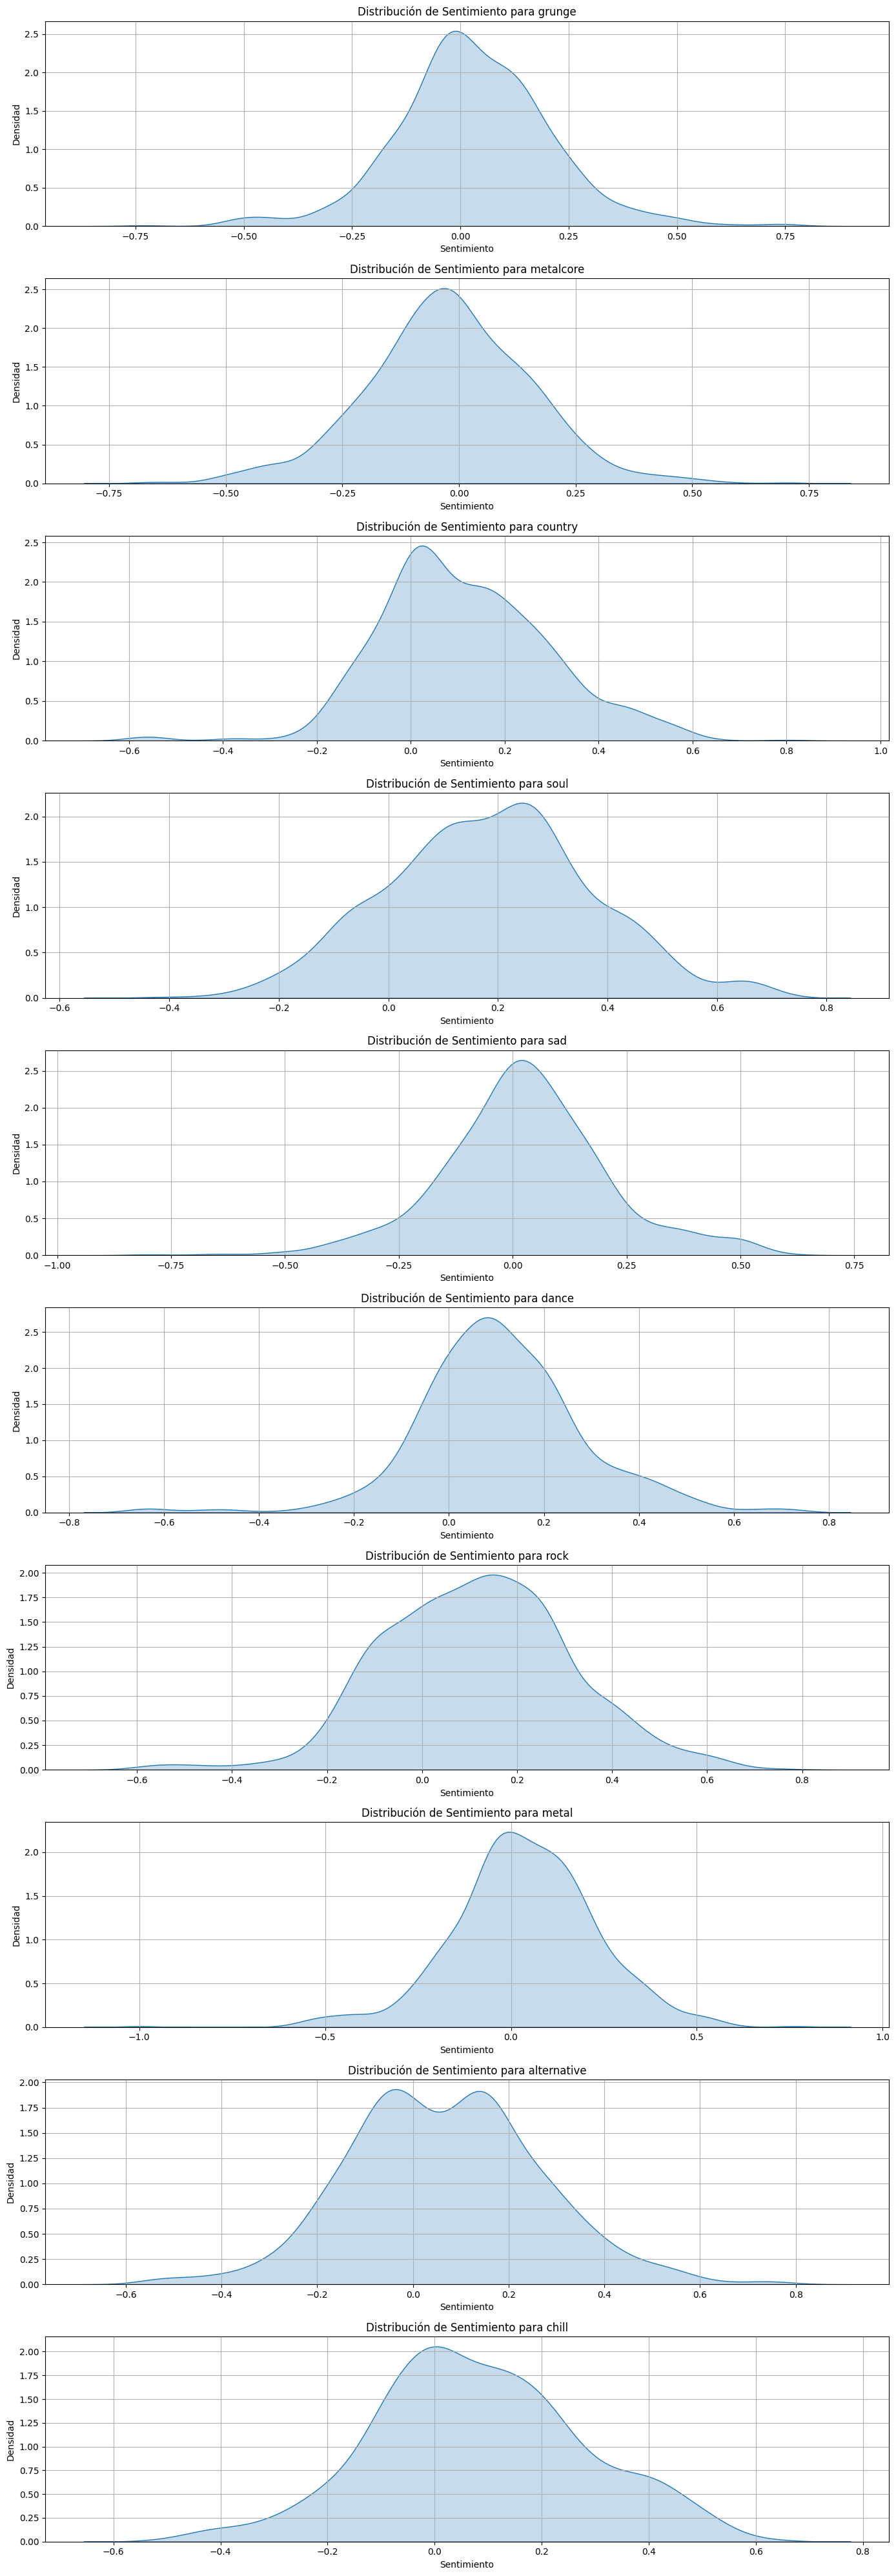

In [81]:
fig, axes = plt.subplots(len(top_generos), 1, figsize=(14, 4 * len(top_generos)))

for i, genero in enumerate(top_generos):
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], ax=axes[i], shade=True, common_norm=False)
    axes[i].set_title(f'Distribución de Sentimiento para {genero}')
    axes[i].set_xlabel('Sentimiento')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True) 

plt.tight_layout()
plt.show()

In [65]:
clasif_genero = spotify.groupby('track_genre')['clasificacion'].agg(lambda x: x.mode()[0])
clasif_genero = pd.DataFrame(clasif_genero)
clasif_genero

,clasificacion
track_genre,
acoustic,positivo
afrobeat,positivo
alt-rock,positivo
alternative,positivo
ambient,positivo
...,...
techno,positivo
trance,positivo
trip-hop,positivo
